### Hodge Decomposition

In [1]:
import os

# set the current working directory
curr_path = os.getcwd().split("/")[:-1]
curr_path = "/".join(curr_path)
os.chdir(curr_path)

In [2]:
from matplotlib import pyplot as plt

from sclibrary.network_reader import NetworkReader
from sclibrary.simplicial_complex import SimplicialComplexNetwork
from sclibrary.plot import SCPlot
from sclibrary.hodgedecomposition import *


data_folder = 'data/paper_data'

# read csv
filename = data_folder + '/edges.csv'
delimeter = " "
src_col = 'Source'
dest_col = 'Target'
feature_cols = ['Distance']

G = NetworkReader.read_csv(filename=filename, delimeter=delimeter, 
                           src_col=src_col, dest_col=dest_col, feature_cols=feature_cols)

simplices = G.simplicies(condition="distance", dist_col_name="Distance", dist_threshold=1.5)

# coordinates
filename = data_folder + '/coordinates.csv'
coordinates = NetworkReader.get_coordinates(filename=filename, 
                                            node_id_col="Id", 
                                            x_col='X', 
                                            y_col='Y', 
                                            delimeter=" ")


# create a simplicial complex network
sc = SimplicialComplexNetwork(simplices=simplices)
scplot = SCPlot(sc=sc, pos=coordinates)

/Users/irtaza.hashmi@futurice.com/Desktop/Thesis/sc-graph-library/sclibrary/plot.py:144: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  node_collection = ax.scatter(


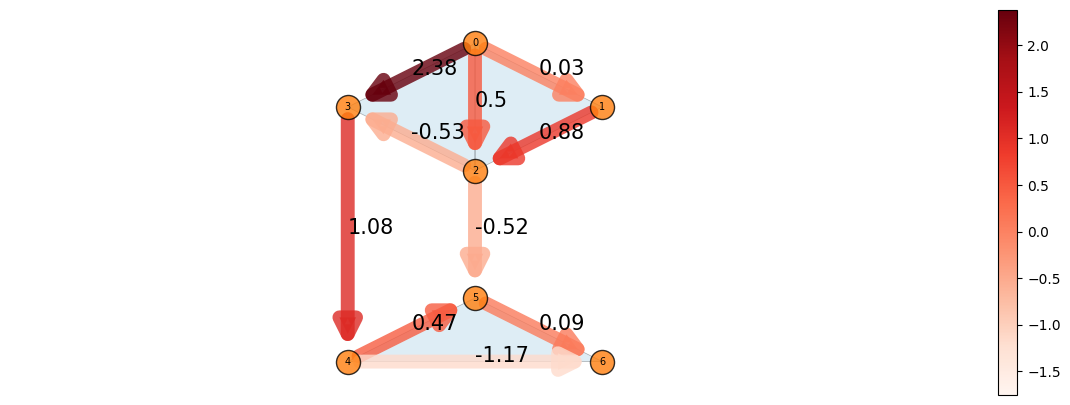

In [3]:
# intial flow f
fig = plt.figure(figsize = (15,5))
synthetic_flow = np.array([0.03, 0.5, 2.38, 0.88, -0.53, -0.52, 1.08, 0.47, -1.17, 0.09])

ax = fig.add_subplot(1, 1, 1)
scplot.draw_flow(flow=synthetic_flow, ax=ax)

In [4]:
# divergence
B1 = sc.incidence_matrix(rank=1)
get_divergence(B1, synthetic_flow)

array([-2.91, -0.85,  2.43,  0.77,  1.78, -0.14, -1.08])

In [5]:
# gradient component
get_gradient_component(B1, synthetic_flow)

array([ 0.25,  1.34,  1.32,  1.1 , -0.02,  0.03,  0.53, -0.47, -0.78,
       -0.3 ])

/Users/irtaza.hashmi@futurice.com/Desktop/Thesis/sc-graph-library/sclibrary/plot.py:144: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  node_collection = ax.scatter(


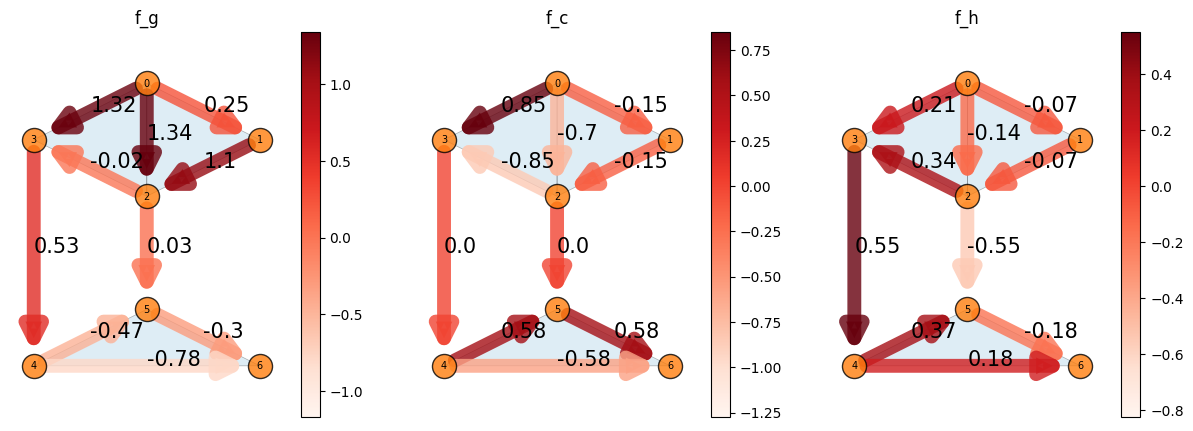

In [6]:
# plot the hodge decomposition
scplot.draw_hodge_decomposition(synthetic_flow)